<a href="https://colab.research.google.com/github/Novaz-Edd/Machine-Learning-Models/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Support Vector Machine**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 1. Read the uploaded file name "heart.csv"
df = pd.read_csv('heart.csv')

# 2. Preprocessing (Turn 'sex: male' into 'sex_male: 1')
df = pd.get_dummies(df, drop_first=True)

# 3. Separate Input (X) and Target (y)
# Target is 'target' (1 = Heart Disease, 0 = Healthy)
X = df.drop('target', axis=1)
y = df['target']

# 4. Split into Train (80%) and Test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"✅ Data Loaded! Training with {X_train.shape[0]} patients.")
print(f"Testing with {X_test.shape[0]} patients.")


✅ Data Loaded! Training with 242 patients.
Testing with 61 patients.


# **Run SVM using Library**

🎯 SVM Accuracy: 0.70 (This means 70.49180327868852% correct)



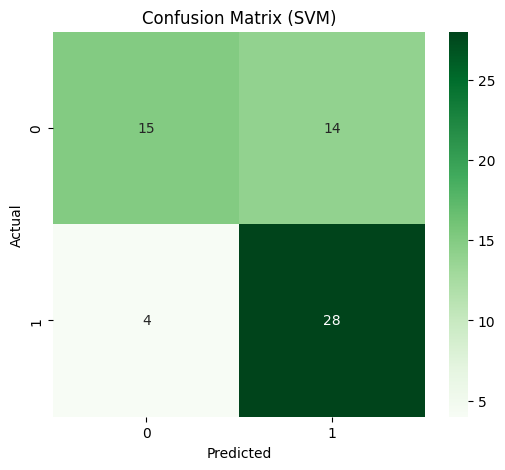

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Train the Model
# kernel='linear' is often good for simple data, but the default (rbf) is also fine
svm_model = SVC()
svm_model.fit(X_train, y_train)

# 2. Predict
y_pred_svm = svm_model.predict(X_test)

# 3. See how well it did
acc_svm = accuracy_score(y_test, y_pred_svm)
print(f"🎯 SVM Accuracy: {acc_svm:.2f} (This means {acc_svm*100}% correct)\n")

# 4. Visualize the Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(6,5))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Greens') # Changed color to Green to distinguish
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (SVM)')
plt.show()

# **Algorithm Under the Hood**

✅ Model Accuracy: 83.61%

--- Detailed Report ---
              precision    recall  f1-score   support

     Healthy       0.83      0.83      0.83        29
        Sick       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



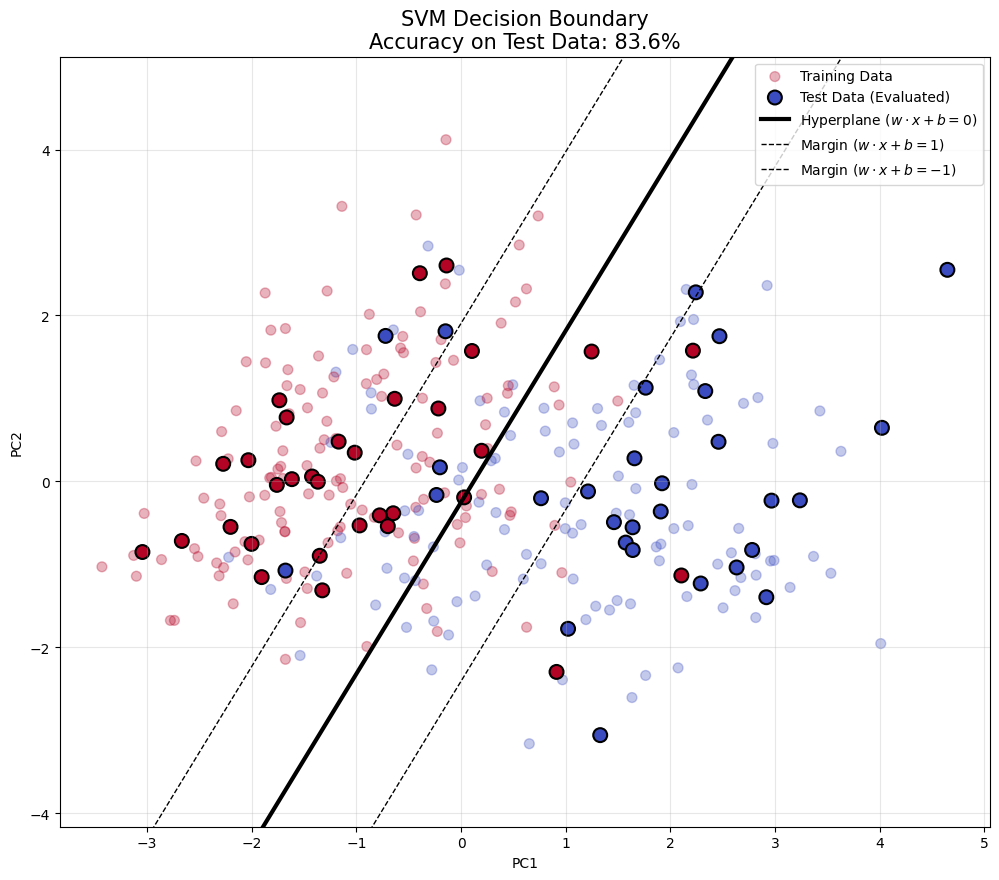

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# ==========================================
# 1. PREPARE DATA
# ==========================================
df = pd.read_csv('heart.csv')
X = df.drop('target', axis=1)
y = df['target']

# Scale and PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# *** NEW: Split Data to measure performance honestly ***
# We use 'random_state=42' so the split is the same every time
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# ==========================================
# 2. FIT SVM (Train on Training Data only)
# ==========================================
clf = SVC(kernel='linear', C=1.0)
clf.fit(X_train, y_train)

# ==========================================
# 3. EVALUATE PERFORMANCE
# ==========================================
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"✅ Model Accuracy: {accuracy:.2%}")
print("\n--- Detailed Report ---")
print(classification_report(y_test, y_pred, target_names=['Healthy', 'Sick']))

# ==========================================
# 4. EXTRACT THE MATH (From the trained model)
# ==========================================
w = clf.coef_[0]
b = clf.intercept_[0]

# Generate x-values (PC1) based on the whole dataset limits for a nice plot
x_min, x_max = X_pca[:, 0].min(), X_pca[:, 0].max()
x_points = np.linspace(x_min, x_max, 100)

# Calculate boundary lines
# Decision Boundary: w*x + b = 0
y_decision = -(w[0] * x_points + b) / w[1]
# Margins: w*x + b = 1 and -1
y_margin_up = -(w[0] * x_points + b - 1) / w[1]
y_margin_down = -(w[0] * x_points + b + 1) / w[1]

# ==========================================
# 5. VISUALIZE
# ==========================================
plt.figure(figsize=(12, 10))

# Plot Training Data (faded)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', s=50, alpha=0.3, label='Training Data')

# Plot Test Data (solid, with black edges) - THESE are the ones we scored!
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', s=100, alpha=1.0, edgecolors='k', linewidth=1.5, label='Test Data (Evaluated)')

# Plot the "Street" (Using raw strings r'' to fix the warning)
plt.plot(x_points, y_decision, color='black', linewidth=3, label=r'Hyperplane ($w \cdot x + b = 0$)')
plt.plot(x_points, y_margin_up, color='black', linestyle='--', linewidth=1, label=r'Margin ($w \cdot x + b = 1$)')
plt.plot(x_points, y_margin_down, color='black', linestyle='--', linewidth=1, label=r'Margin ($w \cdot x + b = -1$)')

plt.title(f'SVM Decision Boundary\nAccuracy on Test Data: {accuracy:.1%}', fontsize=15)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='upper right')
plt.grid(True, alpha=0.3)
plt.ylim(X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1) # Limit y-axis to data range

plt.show()